In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib

import matplotlib.pyplot as plt


In [2]:
#task1
#assume that the length of the cassion, which is same as z, is the range from 5m to 15m


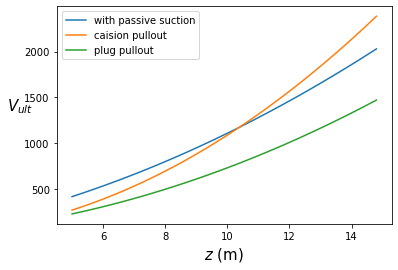

In [3]:

'''condition from the question'''
Dext=2
alpha_o=0.65     #friction factor
A=(np.pi*Dext**2)/4
gamma=6     #submerged unit weight kN/m3
Nc=9   #reverse and bearing factor


def V_capacity(z):
    Su_t=2*z #s_u tip
    Su=2/3*Su_t #average s_u
    
    A_o=z*(np.pi*Dext)
    V_passive=A_o*alpha_o*Su+Nc*Su_t*A

    Ai=A_o    #ignore the thickness
    alpha_i=alpha_o
        
    V_c=A_o*alpha_o*Su+Ai*alpha_i*Su  #outer +inner friction
    W_p=gamma*A*z

    V_p=A_o*alpha_o*Su+W_p      # outer friction +soil plug weight
    return V_passive,V_c,V_p

z =np.arange(5,15,0.2)
V_passive,V_caisson,V_plug=V_capacity(z)

plt.plot(z,V_passive,label='with passive suction')
plt.plot(z,V_caisson,label='caision pullout')
plt.plot(z,V_plug,label='plug pullout')
plt.xlabel(r'$z$ (m)',fontsize=15)
plt.ylabel(r'$V_{ult}$', fontsize=15,rotation=0)
plt.legend()
plt.show()


In [4]:
#from the plot, it can be seen that different V ultimate.
#1200kN 20degree
'''condition from the question'''
D=Dext
T=1200
V=T*np.sin(20*np.pi/180)
H=T*np.cos(20*np.pi/180)
Np=10    #assume from worksheet


for L in np.arange(0.1,1000,0.1):
    Su_t=2*L #s_u tip
    Su=2/3*Su_t #average s_u
    
    A_o=L*(np.pi*Dext)   #Passive suction
    V_passive=A_o*alpha_o*Su+Nc*Su_t*A
    
    Ai=A_o    #ignore the thickness
    alpha_i=alpha_o
    
    V_c=A_o*alpha_o*Su+Ai*alpha_i*Su  #outer +inner friction
    W_p=gamma*A*L  #gamma*area *Height
    
    V_p=A_o*alpha_o*Su+W_p  #V plug
    
    H_max=L*D*Np*Su
    a=L/D+0.5
    b=L/(3*D)+4.5
    
    #V_ult=V_passive   #v_ult
    #V_ult=V_c 
    V_ult=V_p
    
    X=(H/H_max)**a
    Y=(V/V_ult)**b
    F_e=X+Y
    
    if F_e>1 and F_e<1.1:
        print('L:{}m, Failure envolope:{}'.format(L,F_e))


L:7.4m, Failure envolope:1.029358290359447


Ab:0.3063052837250049,As:80.86459490340127,Q:726.1640622325434


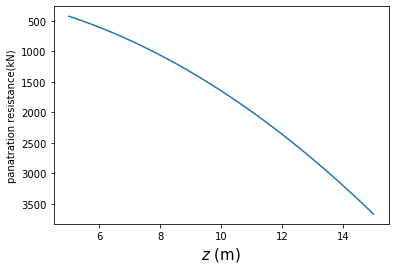

In [5]:
#task2
#values from task1
L=6.6
Su_t=2*L #s_u tips
Su=2/3*Su_t
t=0.05
A_b=np.pi*(D/2)**2-np.pi*(D/2-t)**2
A_s=np.pi*D*L+np.pi*(D-2*t)*L
NC=7.5   #different from task 1 because the skirt tips have different factor.
Q=(NC*Su+gamma*L)*A_b +alpha_o*Su_t*A_s

##profile
l=np.linspace(5,15)

def Q_(l_):
    Su_t=2*l_ #s_u tips
    Su=2/3*Su_t
    A_s=np.pi*D*l_+np.pi*(D-2*t)*l_
    return (Nc*Su+gamma*l_)*A_b +alpha_o*Su_t*A_s


print('Ab:{},As:{},Q:{}'.format(A_b,A_s,Q))
plt.plot(l,Q_(l))
ax = plt.gca()
ax.yaxis.set_ticks_position('left') 
ax.invert_yaxis() 
plt.xlabel(r'$z$ (m)',fontsize=15)
plt.ylabel('panatration resistance(kN)', fontsize=10)

plt.show()

In [6]:
#task3
Nc=9
L=6.6
Su_t=2*L #s_u tips
Su=2/3*Su_t   #average
s_w=180
D=2
t=0.05
a_i=0.65
A_i=np.pi/2*(D/2-t)**2  #internal cross-sectional area of foundation
A_p=A_i

su_pressure=Q-s_w
U_allow=((Nc*Su_t*A_p)+(a_i*Su*A_i))/A_p

#FoS
FoS=U_allow/su_pressure

print('required suction :{}kN, plug area:{}'.format(su_pressure,A_p))
print('allowance pressure:{} kN, safety factor:{}'.format(U_allow,FoS))


required suction :546.1640622325434kN, plug area:1.4176436849323941
allowance pressure:124.52 kN, safety factor:0.22799010152920388


2100.0 1500.0
p_f for short pile:274.9545416973504kN, Hult for short pile:600.0kN


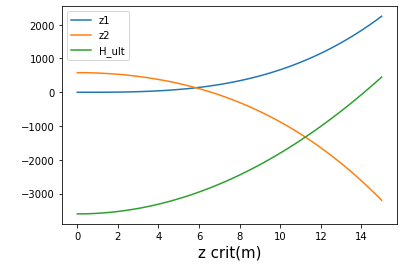

In [7]:
#task 4
#assum short pile, fixed head no hinge
H_ult=2100
D_=1
L_=20
k_su=2  
n=9*k_su
z_c=np.sqrt(2*H_ult/(n*D_))
   
Pf_s=n*z_c*D_
Pab=1/2*n*z_c**2*D_
Pbc=1/2*n*L_**2*D_-1/2*n*z_c**2*D_
P_ult=Pab-abs(Pbc)

Mp=(((H_ult/(n*D_**3))/1.04)**3/2)*n*D_**4
print(Pab,Pbc)
print('p_f for short pile:{}kN, Hult for short pile:{}kN'.format(Pf_s,P_ult))

def Pult(z_):
    Pf_s=n*z_*D_
    Pab=1/2*n*z_**2*D_
    Pbc=1/2*n*L_**2*D_-1/2*n*z_**2*D_
    P_ult=Pab-abs(Pbc)
    return P_ult

#profile
Z=np.linspace(0,15)
C=((L_-Z)/3)*((2*Z+L_)/(Z+L_))
Z1=(2*Z**3)/3
Z2=(L**2-Z**2)*(L_-C)


plt.plot(Z,Z1,label='z1')
plt.plot(Z,Z2,label='z2')
plt.plot(Z,Pult(Z),label='H_ult')
plt.xlabel('z crit(m)',fontsize=15)
plt.ylabel(' ', fontsize=10)
plt.legend()
plt.show()